In [197]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [198]:
# 读取数据
all_files = [f for f in os.listdir('../guazi') if os.path.isfile(f) and f.endswith('_target.csv')]
df_from_each_file = (pd.read_csv(f, names=["city","brand","gender","new_car_price","road_haul","use_date","displacement","follow","transfer","service_price","flaw","price"]) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
drop_duplicates = concatenated_df.drop_duplicates()
drop_na = drop_duplicates.dropna(how='any')
guazi = drop_na.reset_index(drop=True)

In [199]:
# 计算保值率
guazi["hedge_ratio"] = (guazi["price"] / guazi["new_car_price"])*100
nona = guazi
nona

,city,brand,gender,new_car_price,road_haul,use_date,displacement,follow,transfer,service_price,flaw,price,hedge_ratio
0,bj,起亚狮跑,1,20.0,9.3,7.90,2.0,245,0,3500,4,5.75,28.750000
1,bj,丰田威驰,2,9.1,0.9,1.10,1.3,23,0,3500,1,6.07,66.703297
2,bj,长城M4,2,6.9,2.6,4.00,1.5,157,0,3500,0,3.96,57.391304
3,bj,荣威550,1,16.3,7.8,6.11,1.8,187,0,3500,4,4.57,28.036810
4,bj,丰田威驰,1,9.5,0.6,2.60,1.5,25,0,3500,3,6.26,65.894737
5,bj,现代悦动,1,10.8,7.6,6.11,1.6,123,0,3500,5,3.40,31.481481
6,bj,大众宝来,1,11.7,0.5,2.10,1.6,453,0,3500,2,7.41,63.333333
7,bj,标致408,1,14.1,3.1,4.11,2.0,107,0,3500,3,5.00,35.460993
8,bj,起亚智跑,1,22.8,3.4,4.80,2.0,5,0,4252,2,10.63,46.622807
9,bj,现代悦动,1,13.0,10.6,8.10,1.6,23,0,3500,4,3.70,28.461538


In [200]:
# 相关性计算
corr=nona.corr("pearson")
corr

,gender,new_car_price,road_haul,use_date,displacement,follow,transfer,service_price,flaw,price,hedge_ratio
gender,1.000000,0.031676,-0.058033,0.024722,-0.007635,0.004905,-0.025698,0.031334,-0.009090,0.036646,0.002382
new_car_price,0.031676,1.000000,0.094772,0.051937,0.733624,0.073536,0.125856,0.905921,-0.113804,0.913290,-0.006537
road_haul,-0.058033,0.094772,1.000000,0.693726,0.186161,-0.123099,0.211900,-0.057796,0.205728,-0.079361,-0.648431
use_date,0.024722,0.051937,0.693726,1.000000,0.123542,-0.031538,0.288024,-0.119449,0.193043,-0.161322,-0.840115
displacement,-0.007635,0.733624,0.186161,0.123542,1.000000,0.028670,0.110544,0.630259,-0.075157,0.656422,-0.019158
follow,0.004905,0.073536,-0.123099,-0.031538,0.028670,1.000000,-0.017046,0.063323,-0.046248,0.068867,-0.000625
transfer,-0.025698,0.125856,0.211900,0.288024,0.110544,-0.017046,1.000000,0.045970,0.003271,0.037274,-0.265245
service_price,0.031334,0.905921,-0.057796,-0.119449,0.630259,0.063323,0.045970,1.000000,-0.131433,0.989911,0.201530
flaw,-0.009090,-0.113804,0.205728,0.193043,-0.075157,-0.046248,0.003271,-0.131433,1.000000,-0.153967,-0.215321
price,0.036646,0.913290,-0.079361,-0.161322,0.656422,0.068867,0.037274,0.989911,-0.153967,1.000000,0.257457


In [201]:
# OLS Regression Results: 使用年限 - 保值率
X = nona.use_date
Y = nona.hedge_ratio
X=sm.add_constant(X)
est=sm.OLS(Y,X)
est=est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hedge_ratio   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                 9.690e+04
Date:                Fri, 11 Aug 2017   Prob (F-statistic):               0.00
Time:                        18:16:14   Log-Likelihood:            -1.4260e+05
No. Observations:               40395   AIC:                         2.852e+05
Df Residuals:                   40393   BIC:                         2.852e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.2541      0.082    924.741      0.000      76.092      76.416
use_date      -6.2091      0.020   -311.290      0.000      -6.248      -6.170
==============================================================================
Omnibus:                     1829.230   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5856.240
Skew:                          -0.136   Prob(JB):                         0.00
Kurtosis:                       4.845   Cond. No.                         8.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

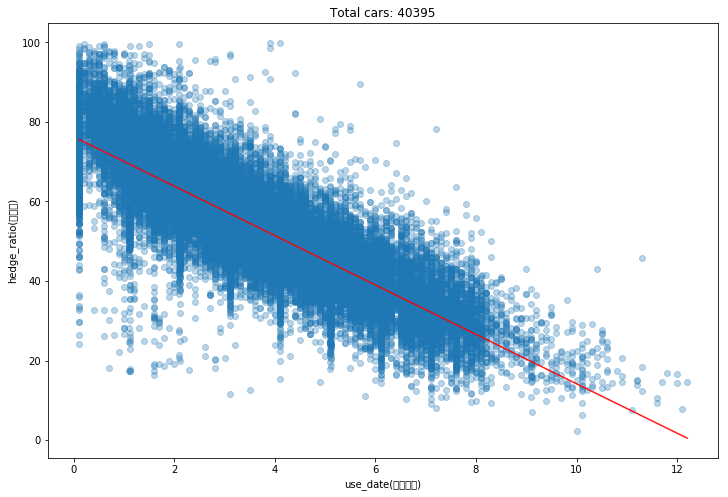

In [202]:
X_prime=np.linspace(X.use_date.min(), X.use_date.max(),100)[:,np.newaxis]
X_prime=sm.add_constant(X_prime)
Y_hat=est.predict(X_prime)
plt.scatter(X.use_date, Y, alpha=0.3) # 画出原始数据
plt.xlabel("use_date(使用年限)")
plt.ylabel("hedge_ratio(保值率)")
plt.title("Total cars: {}".format(len(nona)))
plt.plot(X_prime[:,1], Y_hat, 'r', alpha=0.9) # 添加回归线，红色
plt.show()

In [203]:
# 数据标准化
tensor_no_z_score = nona.loc[:, ['gender','new_car_price','road_haul','use_date','displacement','follow','transfer','service_price','flaw','hedge_ratio']]
tensor = (tensor_no_z_score - tensor_no_z_score.mean())/tensor_no_z_score.std()
tensor

,gender,new_car_price,road_haul,use_date,displacement,follow,transfer,service_price,flaw,hedge_ratio
0,-0.421902,-0.107911,1.075871,2.095033,0.323697,3.558602,-0.480468,-0.415182,0.666672,-1.658411
1,2.368331,-0.562392,-1.316938,-1.206014,-1.001446,-0.541407,-0.480468,-0.415182,-0.517004,0.834479
2,2.368331,-0.654122,-0.832679,0.201786,-0.622833,1.933373,-0.480468,-0.415182,-0.911563,0.222839
3,-0.421902,-0.262185,0.648583,1.226081,-0.054915,2.487428,-0.480468,-0.415182,0.666672,-1.705256
4,-0.421902,-0.545714,-1.402396,-0.477842,-0.622833,-0.504470,-0.480468,-0.415182,0.272113,0.781370
5,-0.421902,-0.491510,0.591612,1.226081,-0.433527,1.305444,-0.480468,-0.415182,1.061231,-1.478999
6,-0.421902,-0.453984,-1.430882,-0.720566,-0.433527,7.400052,-0.480468,-0.415182,-0.122446,0.613129
7,-0.421902,-0.353915,-0.690250,0.255185,0.323697,1.009947,-0.480468,-0.415182,0.272113,-1.217612
8,-0.421902,0.008836,-0.604793,0.590144,0.323697,-0.873841,-0.480468,-0.262133,-0.122446,-0.484470
9,-0.421902,-0.399780,1.446186,2.192123,-0.433527,-0.541407,-0.480468,-0.415182,0.666672,-1.677358


step: 0.000000, loss: 1.808461
step: 100.000000, loss: 1.792506
step: 200.000000, loss: 1.776592
step: 300.000000, loss: 1.761200
step: 400.000000, loss: 1.746065
step: 500.000000, loss: 1.731063
step: 600.000000, loss: 1.716435
step: 700.000000, loss: 1.702148
step: 800.000000, loss: 1.687906
step: 900.000000, loss: 1.673979
step: 1000.000000, loss: 1.660324
step: 1100.000000, loss: 1.646989
step: 1200.000000, loss: 1.633712
step: 1300.000000, loss: 1.620520
step: 1400.000000, loss: 1.607686
step: 1500.000000, loss: 1.595104
step: 1600.000000, loss: 1.582662
step: 1700.000000, loss: 1.570392
step: 1800.000000, loss: 1.558229
step: 1900.000000, loss: 1.546229
step: 2000.000000, loss: 1.534461
step: 2100.000000, loss: 1.522890
step: 2200.000000, loss: 1.511509
step: 2300.000000, loss: 1.500185
step: 2400.000000, loss: 1.488935
step: 2500.000000, loss: 1.477855
step: 2600.000000, loss: 1.466981
step: 2700.000000, loss: 1.456336
step: 2800.000000, loss: 1.445833
step: 2900.000000, loss: 1

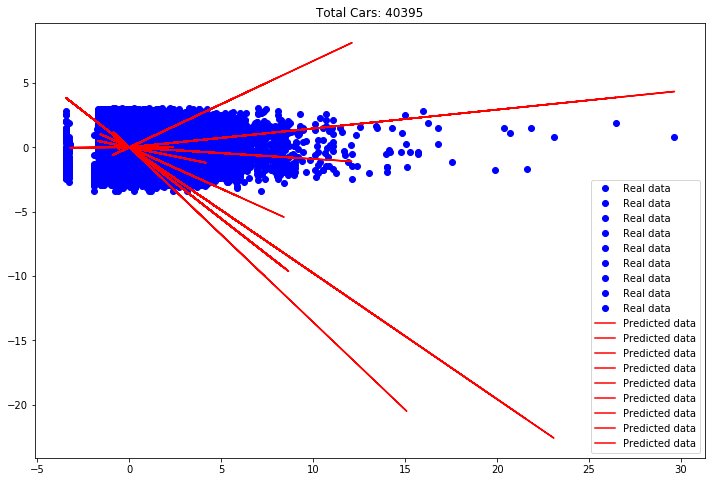

In [204]:
# tensorflow 训练权重
import tensorflow as tf
g = tf.Graph()
with g.as_default():
    xs = tf.placeholder(tf.float64, shape=(None, 9))
    w = tf.Variable(tf.random_normal(shape=[9], dtype=tf.float64))
    b = tf.Variable(0.0, dtype=tf.float64)
    ys = xs * w + b
    ys_ = tf.placeholder(tf.float64, shape=(None, 1))

    loss = tf.reduce_mean(tf.square(ys_ - ys))
    train = tf.train.AdamOptimizer(1e-4).minimize(loss)
    
    
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    test_xs = tensor.iloc[:,:-1]
    test_ys = tensor.iloc[:,-1:]
    
    for step in range(3000):
        batch_ = tensor.sample(n=1000)
        batch_xs = batch_.iloc[:,:-1]
        batch_ys = batch_.iloc[:,-1:]
        sess.run(train, feed_dict={xs: batch_xs, ys_: batch_ys})
        if step % 100 == 0:
            loss_value = sess.run(loss, feed_dict={xs: test_xs, ys_: test_ys})
            print('step: %f, loss: %f' % (step, loss_value))

    w_value, b_value = sess.run([w, b])
    print(w_value, b_value)

X = tensor.iloc[:,:-1]
Y = tensor.iloc[:,-1:]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.title("Total Cars: {0}".format(len(tensor)))
plt.show()

In [205]:
# 预测二手车出售价

In [206]:
# (1)读取出售的二手车
predict = pd.read_csv('../guazi/20170621_target.csv', names=["city","brand","gender","new_car_price","road_haul","use_date","displacement","follow","transfer","service_price","flaw","price"])
predict

,city,brand,gender,new_car_price,road_haul,use_date,displacement,follow,transfer,service_price,flaw,price
0,bj,斯柯达昕锐,1,11.5,1.0,0.90,1.6,27,0,3500,3,7.08
1,bj,雪铁龙世嘉,1,13.2,10.7,7.00,1.6,61,0,3500,7,3.50
2,bj,奥迪Q7,2,108.3,3.1,7.60,3.6,33,0,12400,1,31.00
3,bj,雪铁龙世嘉,1,13.2,6.6,7.11,2.0,15,0,3500,2,3.18
4,bj,福特福克斯,1,12.9,14.4,6.11,1.8,37,0,3500,9,3.40
5,bj,奇瑞瑞虎,1,9.7,2.6,3.90,1.6,21,0,3500,4,4.20
6,bj,雪铁龙世嘉,1,13.8,7.8,4.60,2.0,23,1,3500,0,5.41
7,bj,大众帕萨特,1,26.0,6.2,5.60,1.8,75,0,4932,3,12.33
8,bj,奥迪A6L,2,67.1,9.8,6.70,2.8,53,0,6600,1,16.50
9,bj,大众桑塔纳志俊,1,10.8,6.2,7.60,1.8,33,0,3000,10,2.80


In [207]:
# 预测部分的权重，偏移量，均值，标准差
w_value_real = np.array([w_value])
b_value_real = b_value
mean = np.array(tensor_no_z_score.mean())
std = np.array(tensor_no_z_score.std())
w_value_real, b_value_real, mean, std

(array([[ 0.0095205 , -0.97862573, -0.6452852 , -0.28846437, -1.11256265,
         -1.35952499, -0.09078095,  0.14618152,  0.67102328]]),
 0.00080700096457839913,
 array([  1.15120683e+00,   2.25880777e+01,   5.52313653e+00,
          3.58433098e+00,   1.82900854e+00,   5.23151628e+01,
          3.05978463e-01,   5.53997623e+03,   2.31033544e+00,
          5.39986730e+01]),
 array([  3.58392980e-01,   2.39833985e+01,   3.51051828e+00,
          2.05995257e+00,   5.28244853e-01,   5.41462206e+01,
          6.36834287e-01,   4.91344473e+03,   2.53447603e+00,
          1.52246175e+01]))

In [208]:
# 绘画误差曲线

# (1)计算预测值与真实出售价的 误差百分比
nomalization = np.divide(np.subtract(predict.iloc[:,2:-1], mean[:-1]), std[:-1])
forecast_pre = (np.matmul(nomalization, w_value_real.transpose())).transpose()[0]
forecast_flaw = np.add(np.multiply(np.add(forecast_pre, b_value_real), std[-1]), mean[-1])
forecast_price = np.multiply(np.subtract(1, np.divide(forecast_flaw, 100)),predict['new_car_price'].values)
diff = np.divide(np.subtract(forecast_price,predict['price'].values), predict['price'].values)
diff,len(diff)

(array([-0.97984798,  0.48296318,  4.29576512, ...,  0.37836795,
        -0.36082334, -0.02976941]), 41157)

In [209]:
# (2) 计算误差范围累计的二手车数量
labels = np.array(['1%','5%','10%','20%','30%','40%','50%','1','1+'])
scope = np.array([0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1,100])
cut = pd.cut(abs(diff), scope, right=False, labels=labels)
percent = cut.value_counts()
percent

1      15695
1%       340
1+      7580
10%     1760
20%     3564
30%     3559
40%     3638
5%      1412
50%     3609
dtype: int64

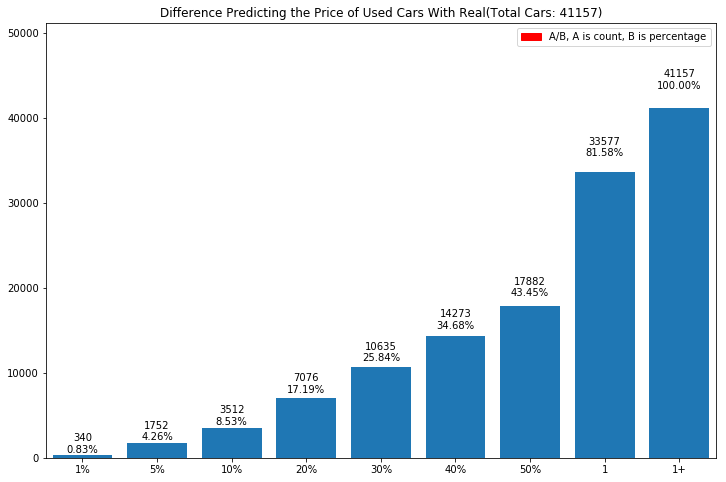

In [210]:
# (3) 预测误差范围的 二手车数量
width = 0.3
ind = np.arange(10)
x = labels
y = np.array([percent['1%'], percent['5%'], percent['10%'], percent['20%'], percent['30%'], percent['40%'], percent['50%'], percent['1'], percent['1+']]).cumsum()

fig, ax = plt.subplots()
rects = ax.bar(range(len(y)), y, width=0.8, align='center')
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.set_ylim(0, y.max()+10000)
ax.set_title('Difference Predicting the Price of Used Cars With Real(Total Cars: {})'.format(len(diff)))
plt.margins(0.01)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '{0}\n{1:.2%}'.format(int(height), (height)/41157),
                ha='center', va='bottom')


autolabel(rects)
red_patch = mpatches.Patch(color='red', label='A/B, A is count, B is percentage')
plt.legend(handles=[red_patch])
plt.rcParams["figure.figsize"] = [12.0,8.0]
plt.show()

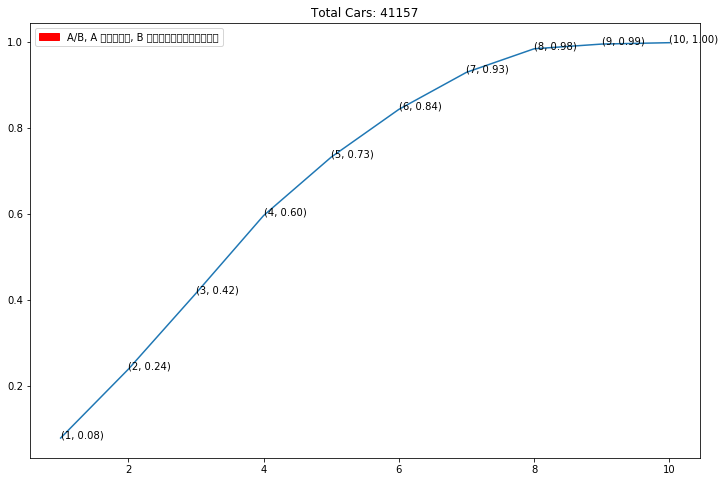

In [211]:
# (4) 二手车出售时间
cut = pd.cut(predict['use_date'], np.arange(11), right=False, labels=np.arange(1,11))
inflection = cut.value_counts()

x = np.arange(1,11)
y = np.divide(inflection.sort_index().cumsum(),len(predict))

red_patch = mpatches.Patch(color='red', label='A/B, A 是使用年限, B 是出售二手车占总量的比例')
plt.legend(handles=[red_patch])
plt.rcParams["figure.figsize"] = [12.0,8.0]
for ab in zip(np.arange(1,11), y): 
    plt.annotate('(%d, %.2f)' % ab, xy=ab, textcoords='data')
plt.title('Total Cars: {}'.format(len(predict)))
plt.plot(x,y)
plt.show()